In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
# processing data

data_path = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
             "heart-disease/processed.cleveland.data")
df = pd.read_csv(data_path)
X = df.iloc[:, :13]
y = df.iloc[:, 13]
X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 0, 1)
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

In [31]:
# computing percentage of datapoints accurately categorized for each value of k from 1 to 20

accuracy=[]
    
for k in range(1,21):
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
    # With two categories to classify into, for each of the k-means groups we treat the category
    # with the most assignments in that group as the 'correct' category
    # meaning that the minimum counts for each category indicate
    # incorrect assignments.
    correct=(sum(pd.crosstab(y_pred, y).apply(max,axis=1))/len(y_pred))*100
    accuracy.append(correct)

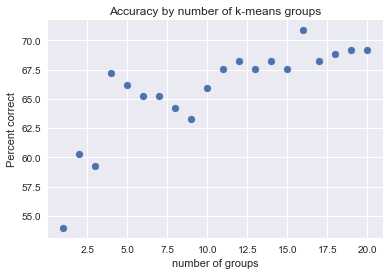

In [32]:
plt.scatter(range(1,21), accuracy)
plt.title('Accuracy by number of k-means groups')
plt.ylabel('Percent correct')
plt.xlabel('number of groups')
plt.show()

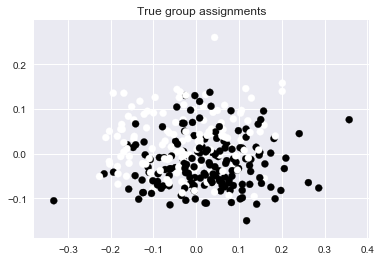

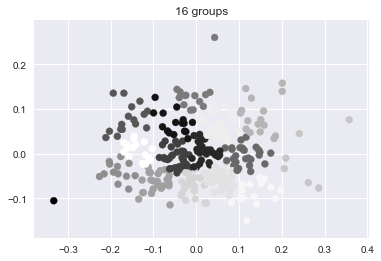

In [33]:
# True assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('True group assignments')
plt.show()


# plotting the 'best' solution
y_pred = KMeans(n_clusters=16, random_state=42).fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('16 groups')
plt.show()